In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from keras.datasets import fashion_mnist
(images_train, labels_train), (images_test, labels_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
images_test.shape

(10000, 28, 28)

In [4]:
labels_train.shape

(60000,)

In [5]:
# getting the labels-
labels_train= np.array(labels_train).reshape(-1,1)
labels_test= np.array(labels_test).reshape(-1,1)

In [6]:
labels_train.shape

(60000, 1)

In [7]:
labels_test.shape

(10000, 1)

In [8]:
onehot = OneHotEncoder()
onehot.fit(labels_train)

labels_train= onehot.transform(labels_train).toarray()
labels_test= onehot.transform(labels_test).toarray()

In [9]:
labels_test.shape

(10000, 10)

In [10]:
np.unique(labels_test)

array([0., 1.])

In [11]:
images_test.shape

(10000, 28, 28)

In [12]:
images_train = np.array(images_train).reshape(60000,28*28)/255
images_test = np.array(images_test).reshape(10000,28*28)/255

In [13]:
images_train = images_train.reshape(60000,28,28,1).astype('float32')
images_test = images_test.reshape(10000,28,28,1).astype('float32')

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [15]:
#using Sequential API
model_sql= Sequential()
model_sql.add(Conv2D(32,(2,2),activation='relu',input_shape=(28,28,1), padding='same')) # Number of filters, size of the filter, activation, input
model_sql.add(MaxPooling2D((2,2)))  # pool size
model_sql.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_sql.add(MaxPooling2D((2,2)))
model_sql.add(Conv2D(32,(2,2),activation='relu', padding='same'))
model_sql.add(MaxPooling2D((2,2)))

model_sql.add(Flatten())

model_sql.add(Dense(1024,activation='relu'))     # hidden units, activation
model_sql.add(Dropout(0.2))  # dropout rate
model_sql.add(Dense(200,activation='relu'))
model_sql.add(Dropout(0.2))
model_sql.add(Dense(10,activation='softmax'))

model_sql.summary()
model_sql.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       295,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 200)            │       205,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 529,826 (2.02 MB)

 Trainable params: 529,826 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

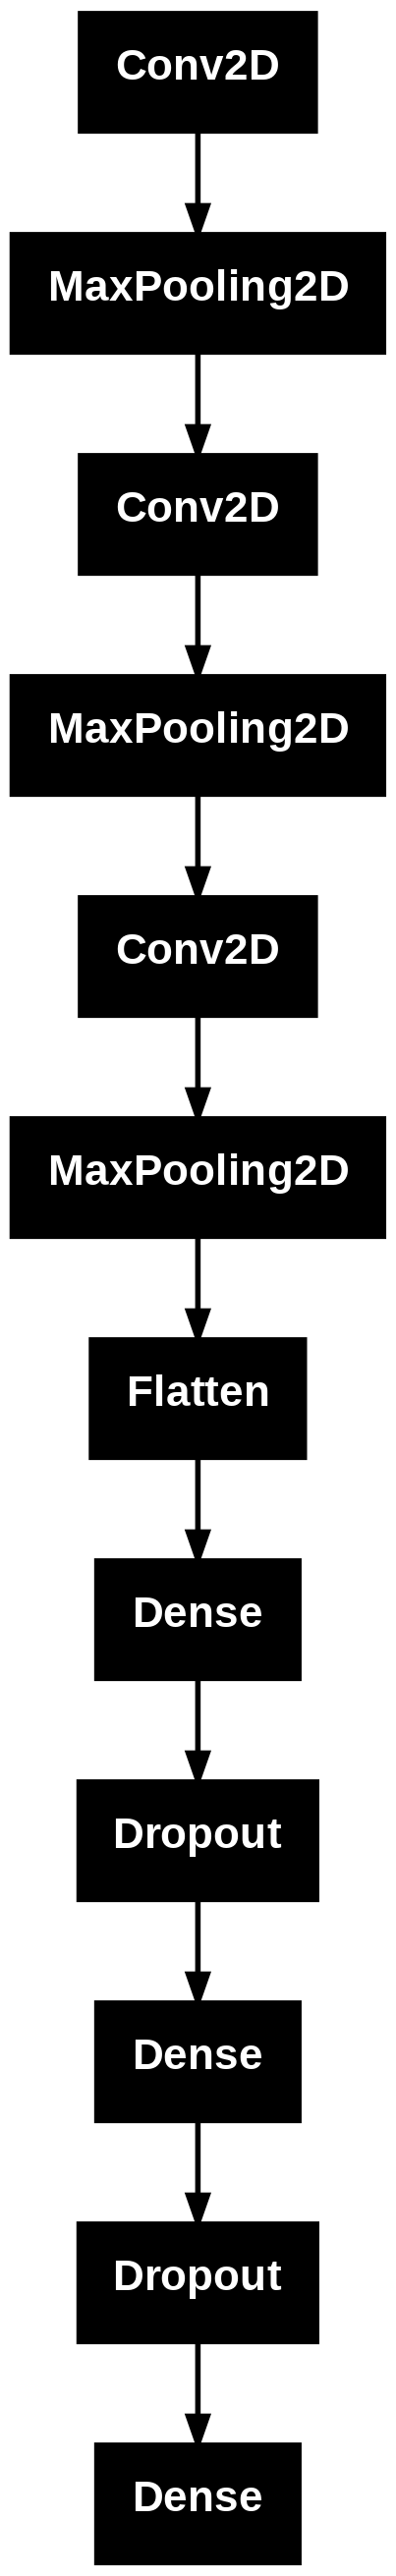

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model_sql)

In [17]:
model_sql.fit(images_train,labels_train,epochs=80,batch_size=5000,validation_data=(images_test,labels_test))

Epoch 1/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - accuracy: 0.2898 - loss: 2.0539 - val_accuracy: 0.6447 - val_loss: 0.9614
Epoch 2/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - accuracy: 0.6124 - loss: 0.9979 - val_accuracy: 0.7267 - val_loss: 0.7350
Epoch 3/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step - accuracy: 0.7175 - loss: 0.7481 - val_accuracy: 0.7615 - val_loss: 0.6089
Epoch 4/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - accuracy: 0.7641 - loss: 0.6180 - val_accuracy: 0.7938 - val_loss: 0.5430
Epoch 5/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - accuracy: 0.7887 - loss: 0.5529 - val_accuracy: 0.8157 - val_loss: 0.4989
Epoch 6/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.8128 - loss: 0.5003 - val_accuracy: 0.8277 - val_loss: 0.4725
Epoch 7/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 71s 6s/step - accuracy: 0.8306 - loss: 0.4623 - val_accuracy: 0.8446 - val_loss: 0.4327
Epoch 8/80
12/12 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - accuracy: 0.8461 - loss: 0.4277 - val_accuracy: 0.8483 - val_loss:

In [18]:
#saving the model
from tensorflow.keras.models import model_from_json
model_json = model_sql.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_sql.save_weights("model.weights.h5") # Changed the filename to end with .weights.h5

In [19]:
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

In [20]:
p=loaded_model.predict(images_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [21]:
labels_predicted = np.argmax(p,1)

In [22]:
pd.crosstab(np.argmax(labels_test,axis = 1),labels_predicted)

col_0,1,2,3,4,6,8,9
row_0,,,,,,,
0,269,1,0,725,0,5,0
1,954,2,0,43,0,1,0
2,101,0,0,882,0,17,0
3,678,20,3,296,0,2,1
4,324,0,0,660,0,16,0
5,93,0,13,891,3,0,0
6,265,1,0,711,0,23,0
7,15,0,7,977,1,0,0
8,59,0,0,938,0,3,0


In [23]:
y_true = np.argmax(labels_test,axis=1)

In [24]:
(y_true == labels_predicted).sum()

np.int64(1620)

In [25]:
a=y_true == labels_predicted

In [26]:
c = [i for i, j in enumerate(a) if not j]

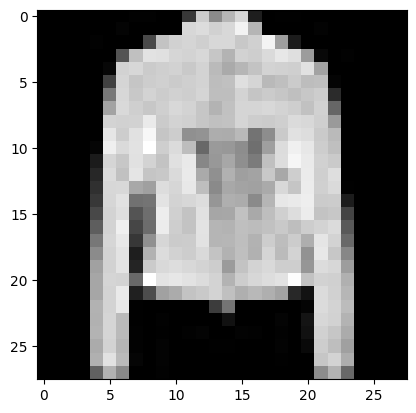

Real label: 4
Predicted label: 4


In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
ind = 7434
sample_image= images_test[ind,:,:,:]
pixels= sample_image.reshape((28,28,1))
plt.imshow(pixels, cmap='gray')
plt.show()
print('Real label:', np.argmax(labels_test[ind]))
print('Predicted label:', labels_predicted[ind])

In [28]:
loaded_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
loaded_model.fit(images_train,labels_train,epochs=10,batch_size=50,validation_data=(images_test,labels_test))

Epoch 1/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 78s 63ms/step - accuracy: 0.7455 - loss: 0.6961 - val_accuracy: 0.8611 - val_loss: 0.3723
Epoch 2/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.8822 - loss: 0.3231 - val_accuracy: 0.8893 - val_loss: 0.2918
Epoch 3/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 78s 65ms/step - accuracy: 0.9013 - loss: 0.2674 - val_accuracy: 0.8982 - val_loss: 0.2777
Epoch 4/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 79s 63ms/step - accuracy: 0.9104 - loss: 0.2389 - val_accuracy: 0.8882 - val_loss: 0.3131
Epoch 5/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 75s 63ms/step - accuracy: 0.9167 - loss: 0.2251 - val_accuracy: 0.9094 - val_loss: 0.2545
Epoch 6/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 77s 64ms/step - accuracy: 0.9247 - loss: 0.2030 - val_accuracy: 0.9090 - val_loss: 0.2568
Epoch 7/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.9304 - loss: 0.1864 - val_accuracy: 0.9156 - val_loss: 0.2432
Epoch 8/10
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.9330 -